## Logistic Regression with scikit-learn
### Steps:
1. **Import** packages, functions, and classes
2. **Get** data to work with and, if appropriate, transform it
3. **Create** a classification model and train (or fit) it with your existing data
4. **Evaluate** your model to see if its performance is satisfactory

### Example 1

In [1]:
#Step1: Import Packages, Functions, and Classes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#Step 2: Get Data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [9]:
#Step 3: Create a Model and Train It
model = LogisticRegression(solver='liblinear', random_state=0)
#Fit the model
model.fit(x, y)
#The above two statement can be clubbed together as well
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
print(model)

LogisticRegression(random_state=0, solver='liblinear')

In [11]:
print(model.classes_) #shows the array of distinct value of y
print(model.intercept_) #bo value
print(model.coef_) #b1 value

[0 1]
[-1.04608067]
[[0.51491375]]


In [13]:
#Step 4: Evaluate the Model
#predict_proba() can help in evaluating the model
model.predict_proba(x)  
#first columns is the probability of predicted output being 0 ie [1-p(x)].
#2nd col probability of predicted output being 1 ie [p(x)].

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [14]:
#actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict()
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [16]:
#accuracy of the model
model.score(x, y) #equals correct predicted output by total outputs.

0.9

### Confusion Matrix in Binary Classification

- **True negatives** in the upper-left position
- **False negatives** in the lower-left position
- **False positives** in the upper-right position
- **True positives** in the lower-right position

To create the confusion matrix, you can use `confusion_matrix()` and provide the actual and predicted outputs as the arguments:

In [17]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

#### The interpretation
- **Three true negative predictions**: The first three observations are zeros predicted correctly.
- **No false negative predictions**: These are the ones wrongly predicted as zeros.
- **One false positive prediction**: The fourth observation is a zero that was wrongly predicted as one.
- **Six true positive predictions**: The last six observations are ones predicted correctly.

### Better visualization of Confusion Matrix

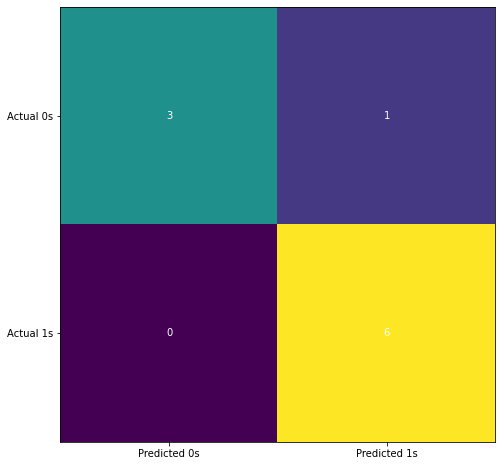

In [26]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w')
plt.show()
#This is actually a heatmap which represents the confusion matrix

In [27]:
#More comprehesive report on classification
print(classification_report(y, model.predict(x)))
#output_dict=True will give value in dictionary
print(classification_report(y, model.predict(x), output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

{'0': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4}, '1': {'precision': 0.8571428571428571, 'recall': 1.0, 'f1-score': 0.923076923076923, 'support': 6}, 'accuracy': 0.9, 'macro avg': {'precision': 0.9285714285714286, 'recall': 0.875, 'f1-score': 0.8901098901098901, 'support': 10}, 'weighted avg': {'precision': 0.9142857142857143, 'recall': 0.9, 'f1-score': 0.8967032967032967, 'support': 10}}


### Improve the Model

Improving of model can be done using different parameters For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0

In [28]:
model1 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model1.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [29]:
print(model1.intercept_) #bo value
print(model1.coef_) #b1 value
print(model1.predict_proba(x))
print(model1.predict(x))

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]


In [32]:
print(model1.score(x, y))
print(confusion_matrix(y, model1.predict(x)))
print(classification_report(y, model1.predict(x)))

1.0
[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Example 2
It’s similar to the previous one, except that the output differs in the second value.

In [33]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [34]:
#Results
print('x:', x, sep='\n')
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 1 0 0 1 1 1 1 1 1]

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## Logistic Regression in Python With StatsModels

In [35]:
#Step 1: Import Packages
import numpy as np
import statsmodels.api as sm

In [39]:
#Step 2: Get Data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x) # for considering b0 as StatsModels doesn't b0 into account.
print(x) #first column is b0 value and 2nd col is original values of x
print(y)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[0 1 0 0 1 1 1 1 1 1]


In [40]:
#Step 3: Create a Model and Train It
model = sm.Logit(y, x)
result = model.fit(method='newton')  # .fit_regularized() uses L1 regularization

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [41]:
result.params  #values of b0 and b1

array([-1.972805  ,  0.82240094])

In [42]:
#Step 4: Evaluate the Model
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [43]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [45]:
#obtain the confusion matrix with .pred_table()
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.4263
Time:                        18:35:31   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [47]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2020-11-08 18:36 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

# Logistic Regression in Python: Handwriting Recognition

Each image has 64 px, with a width of 8 px and a height of 8 px.

The inputs (𝐱) are vectors with **64 dimensions or values**. Each input vector describes one image. Each of the 64 values represents *one pixel of the image*. The input values are the integers between 0 and 16, depending on the shade of gray for the corresponding pixel. The **output (𝑦)** for each observation is an integer between 0 and 9, consistent with the digit on the image. There are *ten* classes in total, each corresponding to one image.

In [48]:
#Step 1: Import Packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
#Step 2a: Get Data
x, y = load_digits(return_X_y=True)
print("x------->\n", x, x.shape)
print("y------->\n", y, y.shape)

x------->
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64)
y------->
 [0 1 2 ... 8 9 8] (1797,)


In [71]:
#Step 2b: Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("X-train:------>\n", x_train, x_train.shape)
print("X-test:------->\n", x_test, x_test.shape)

X-train:------>
 [[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]] (1437, 64)
X-test:------->
 [[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  1.  9. ...  4.  0.  0.]
 [ 0.  0.  0. ... 15.  2.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]] (360, 64)


In [72]:
#Step 2c: Scale Data
#You can standardize your inputs by creating an instance of StandardScaler and calling .fit_transform() on it:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [75]:
#Step 3: Create a Model and Train It
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

When you’re working with problems with more than two classes, you should specify the `multi_class` parameter of `LogisticRegression`. It determines how to solve the problem:

- **'ovr'** says to make the binary fit for each class.
- **'multinomial'** says to apply the multinomial loss fit.

In [76]:
#Step 4: Evaluate the Model
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print(x_test)
print(y_pred)
print("Train Score: ", model.score(x_train, y_train))
print("Test Score: ", model.score(x_test, y_pred))

[[ 0.         -0.33790435  1.20793253 ...  1.07172193  3.53125595
   4.46516425]
 [ 0.          0.74354009  2.04405924 ... -0.97442211 -0.49765616
  -0.18695903]
 [ 0.          1.82498453  1.62599589 ...  1.58325794  3.53125595
   1.5575872 ]
 ...
 [ 0.          0.74354009  0.78986918 ... -0.4628861  -0.49765616
  -0.18695903]
 [ 0.         -0.33790435 -1.09141592 ...  1.41274594  0.00595786
  -0.18695903]
 [ 0.         -0.33790435 -1.09141592 ...  0.90120993 -0.49765616
  -0.18695903]]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 9 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 0 1 5 2 5 3 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 3 7 2 7 8 5 5 7 5

In [77]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

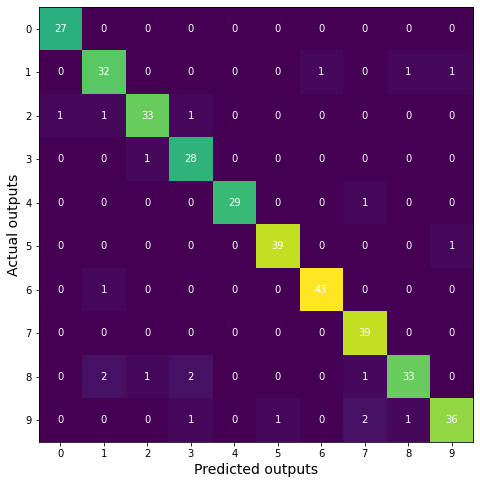

In [78]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

